# PROJECT : CASE STUDY 

## Description

This dataset has funding information of the Indian startups from January 2015 to August 2017.

Feature Details :

1. SNo - Serial number.

2. Date - Date of funding in format DD/MM/YYYY.

3. StartupName - Name of the startup which got funded.

4. IndustryVertical - Industry to which the startup belongs.

5. SubVertical - Sub-category of the industry type.

6. CityLocation - City which the startup is based out of.

7. InvestorsName - Name of the investors involved in the funding round.

8. InvestmentType - Either Private Equity or Seed Funding.

9. AmountInUSD - Funding Amount in USD.

10. Remarks - Other information, if any.

Insights -

1. Find out what type of startups are getting funded in the last few years?

2. Who are the important investors?

3. What are the hot fields that get a lot of funding these days?

In this section, you need to try to find out answer to the given questions using the solutions you have done in Case Study (part 1) or you might need to write code to find the answers.

Find out answer for each question.

### Data Set Link
https://drive.google.com/file/d/1Cw4D6neR3hoJzTupuJJz6YZ0Bk1R_0Cf/view?usp=share_link

### Creating Path

In [1]:
path = 'startup_funding.csv'

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import csv
import warnings
import matplotlib.pyplot as plt
import collections

## Case Study : Questions

###  Question 1
 Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance.But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi.Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding.Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

###  Solution

Bangalore 637
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


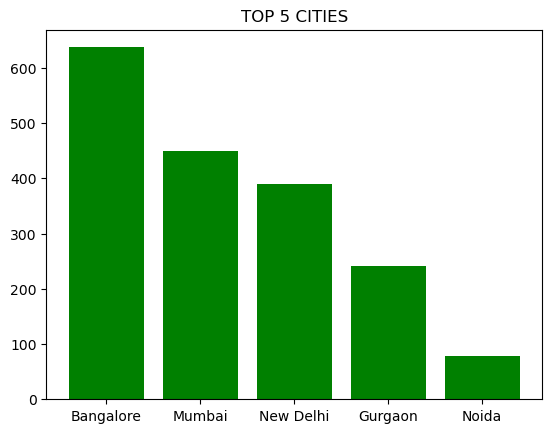

In [24]:
## LOAD DATASET
df = pd.read_csv(path)
df = df.copy()
df.replace(np.nan, 0, inplace = True)
## creating new city column

def extract_city(city) :
    city = str(city)
    if city == '0' :
        return ''
    city_list = city.split('/')
    city1 = city_list[0]
    city1 = city1[0].upper() + city1[1 : ]
    if city1 == 'Delhi' :
        return 'New Delhi'
    if (len(city_list) > 1) :
        city2 = city_list[1]
        city2 = city2.lower().strip()
        if city2 == 'bangalore' :
            return 'Bangalore'
    return city1.strip()
new_col = df.CityLocation.apply(extract_city)
del df['CityLocation']
df['CityLocation'] = new_col

valid_cities = ('Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'New Delhi')
valid_df = df[(df.CityLocation == 'Bangalore') | (df.CityLocation == 'Mumbai') | (df.CityLocation == 'Gurgaon') 
       | (df.CityLocation == 'Noida') | (df.CityLocation == 'New Delhi')]

myDict = valid_df.CityLocation.value_counts().to_dict()
cities = list(myDict.keys())
freq = list(myDict.values())
for i in range(len(cities)) :
    print(cities[i], freq[i])
plt.bar(cities, freq, color = 'green')
plt.title('TOP 5 CITIES')
plt.show()

### Question 2

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

### Solution

Top 5 investors
Sequoia Capital 64
Accel Partners 59
Kalaari Capital 46
Blume Ventures 46
SAIF Partners 43


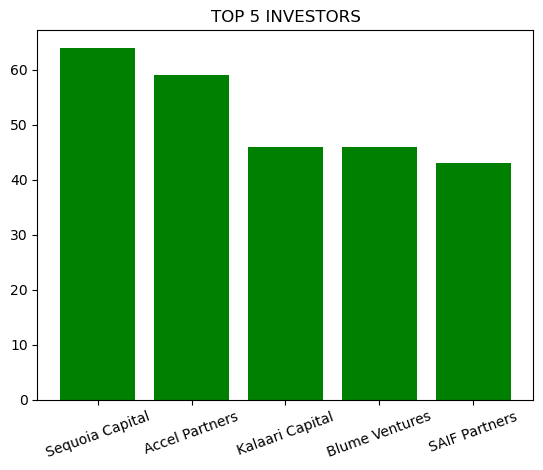

In [5]:
## creating dataframe
df = pd.read_csv(path)
## cleaning InvestorsName
df.InvestorsName.fillna('', inplace = True)
df = df[df.InvestorsName != '']
## removing 'Undisclosed Investors', 'Undisclosed investors', 'undisclosed investors', 'Undisclosed Investor', 'Undisclosed',
## 'Undisclosed investor' ,'Undisclosed HNIs' ,'undisclosed investor', "High Networth Individuals (undisclosed)", 'undisclosed private investors',
## 'Undisclosed US Based Investors', Other undisclosed investors, '3 undisclosed investors' 

## note the names are separated with '&', ',', 'and' if multiple investors


tup = ('Undisclosed Investors', 'Undisclosed investors', 'undisclosed investors', 'Undisclosed Investor', 'Undisclosed',
'Undisclosed investor' ,'Undisclosed HNIs' ,'undisclosed investor', "High Networth Individuals (undisclosed)", 'undisclosed private investors',
'Undisclosed US Based Investors', "Other undisclosed investors", '3 undisclosed investors')

for i in tup :
    df = df[df.InvestorsName != i]

## note here 'Nitin Bagmane & Other undisclosed investors' would still be there, so now to create dict with each person

investors = df.InvestorsName

investors_VS_fundings = {}

for names in investors :
    ## split by comma and strip spaces
    name_list = names.split(',')
    ## traverse each name in this list
    for name in name_list :
        ## remove space
        name = name.strip()
        ## split again with "&"
        final_names = name.split('&')
        for final_name in final_names :
            ## remove space
            final_name = final_name.strip()
            ## remove 'and'
            final_names_list = final_name.split('and')
            for FINAL_NAME in final_names_list :
                FINAL_NAME = FINAL_NAME.strip()
                ## create dictionary
                key = investors_VS_fundings.get(FINAL_NAME)
                if not key :
                    investors_VS_fundings[FINAL_NAME] = 1
                else :
                    investors_VS_fundings[FINAL_NAME] += 1

## dictionary created
## sort it in descending order by value
sorted_dict = {}
sorted_values = sorted(investors_VS_fundings.values(), reverse = True)

for i in sorted_values:
    for k in investors_VS_fundings.keys():
        if investors_VS_fundings[k] == i:
            sorted_dict[k] = investors_VS_fundings[k]

## remove others and ''
del sorted_dict['Others']
del sorted_dict['']
del sorted_dict['others']
## for top 5

names = list(sorted_dict.keys())[0 : 5]
funds = list(sorted_dict.values())[0 : 5]

plt.bar(names, funds, color = 'green')
plt.xticks(rotation = 20)
plt.title('TOP 5 INVESTORS')

## output
print('Top 5 investors')
for i in range(len(names)) :
    print(names[i], funds[i])

plt.show()


### Question 3
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

### Solution

Accel Partners 50
Sequoia Capital 48
Kalaari Capital 41
Blume Ventures 41
Indian Angel Network 40


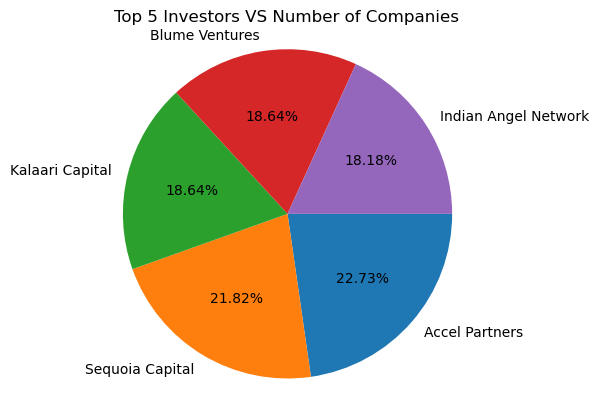

In [6]:
## creating dataframe
df = pd.read_csv(path)
## cleaning InvestorsName
df.InvestorsName.fillna('', inplace = True)
df = df[df.InvestorsName != '']
## removing 'Undisclosed Investors', 'Undisclosed investors', 'undisclosed investors', 'Undisclosed Investor', 'Undisclosed',
## 'Undisclosed investor' ,'Undisclosed HNIs' ,'undisclosed investor', "High Networth Individuals (undisclosed)", 'undisclosed private investors',
## 'Undisclosed US Based Investors', Other undisclosed investors, '3 undisclosed investors' 

## note the names are separated with '&', ',', 'and' if multiple investors


tup = ('Undisclosed Investors', 'Undisclosed investors', 'undisclosed investors', 'Undisclosed Investor', 'Undisclosed',
'Undisclosed investor' ,'Undisclosed HNIs' ,'undisclosed investor', "High Networth Individuals (undisclosed)", 'undisclosed private investors',
'Undisclosed US Based Investors', "Other undisclosed investors", '3 undisclosed investors')

for i in tup :
    df = df[df.InvestorsName != i]

## note here 'Nitin Bagmane & Other undisclosed investors' would still be there, so now to create dict with each person


investors_VS_companies = {}


## clean startup names 

df.StartupName.fillna('', inplace = True)
df = df[df.StartupName != '']

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)

df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)

df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)

df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

companies = list(df.StartupName)
investors = list(df.InvestorsName)



index = 0

for i in range(len(investors)) :
    names = investors[i]
    ## split by comma and strip spaces
    name_list = names.split(',')
    ## traverse each name in this list
    for name in name_list :
        ## remove space
        name = name.strip()
        ## split again with "&"
        final_names = name.split('&')
        for final_name in final_names :
            ## remove space
            final_name = final_name.strip()
                ## create dictionary
            key = investors_VS_companies.get(final_name)
            if not key :
                val = set()
                val.add(companies[i])
                investors_VS_companies[final_name] = val
            else :
                investors_VS_companies[final_name].add(companies[i])

## dictictionary created now change the values to len of values

for key in investors_VS_companies :
    investors_VS_companies[key] = len(investors_VS_companies[key])

## sort the new dictionary
sorted_dict = {}
sorted_values = sorted(investors_VS_companies.values(), reverse = True)

for i in sorted_values:
    for k in investors_VS_companies.keys():
        if investors_VS_companies[k] == i:
            sorted_dict[k] = investors_VS_companies[k]

## remove others and ''

del sorted_dict['Others']
del sorted_dict['']
del sorted_dict['others']

## take top 5

names = list(sorted_dict.keys())[0 : 5]
number_of_companies = list(sorted_dict.values())[0 : 5]

## plot graph

plt.pie(number_of_companies, labels = names, counterclock = False, autopct = '%0.2f%%')
plt.title('Top 5 Investors VS Number of Companies')
plt.axis('equal')


## output

for i in range(len(names)) :
    print(names[i], number_of_companies[i])
plt.show()

### Question 4
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

### Solution

Indian Angel Network 34
Rajan Anandan 23
Anupam Mittal 18
LetsVenture 16
Kunal Shah 15


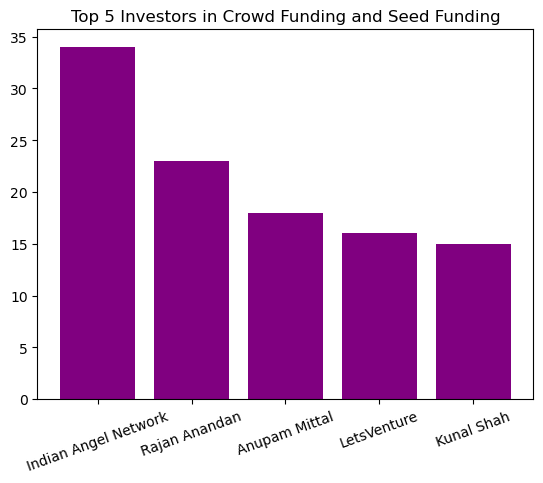

In [7]:
df = pd.read_csv(path)
df
# clean -> InvestorsName, InvestorsName, IndustryVertical
df.InvestorsName.fillna('', inplace = True)
df = df[df.InvestorsName != '']

df.StartupName.fillna('', inplace = True)
df = df[df.StartupName != '']
# InvestmentType
df.InvestmentType.fillna('', inplace = True)
df = df[df.InvestmentType != '']

tup = ('Undisclosed Investors', 'Undisclosed investors', 'undisclosed investors', 'Undisclosed Investor', 'Undisclosed',
'Undisclosed investor' ,'Undisclosed HNIs' ,'undisclosed investor', "High Networth Individuals (undisclosed)", 'undisclosed private investors',
'Undisclosed US Based Investors', "Other undisclosed investors", '3 undisclosed investors')

## clean this as well 

for i in tup :
    df = df[df.InvestorsName != i]

valid_df = df.copy()

## approach is to create invstor name dictionary with company names where its certain type of startups
## to add that particular startup we need to make a dictionary of startup and types

## must correct spelling first of types

company_types = []

for types in valid_df.InvestmentType :
    types = types.lower().replace(' ', '')
    if types == 'privateequity' :
        company_types.append('Private Equity')
    elif types == "seedfunding" :
        company_types.append("Seed Funding")
    elif types == "debtfunding" :
        company_types.append("Debt Funding")
    elif types == "crowdfunding" :
        company_types.append("Crowd Funding")
    else :
        pass
## add this new column
valid_df['valid_types'] = company_types

## drop prev column
valid_df.drop('InvestmentType', axis = 1, inplace = True)

## spelling mistakes for startup names

valid_df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
valid_df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
valid_df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
valid_df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)

valid_df['StartupName'].replace('Olacabs','Ola',inplace = True)
valid_df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
valid_df['StartupName'].replace('Olacabs','Ola',inplace = True)

valid_df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)

valid_df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

## create dictionary with these 2 columns : startup name VS types

startup_VS_types = {}

startup_names = list(valid_df.StartupName)
startup_types = list(valid_df.valid_types)

for i in range(len(startup_names)) :
    startup_VS_types[startup_names[i]] = startup_types[i]

## for adding compamies to investors names creating dictionary

investors_VS_companies = {}

## each investor can be multiple and separtated by ',', '&'

investors = list(valid_df.InvestorsName)
companies = list(valid_df.StartupName)

for i in range(len(investors)) :
    names = investors[i]
    names_list = names.split(',')
    for name in names_list :
        name = name.strip()
        final_names_list = name.split('&')
        for final_names in final_names_list :
            final_names = final_names.strip()
            valid_company = companies[i]
            company_type = startup_VS_types[companies[i]]
            if company_type == "Crowd Funding" or company_type == "Seed Funding" :
                key = investors_VS_companies.get(final_names)
                if not key :
                    val = set()
                    val.add(valid_company)
                    investors_VS_companies[final_names] = val
                else :
                    investors_VS_companies[final_names].add(valid_company)

## change values to len of values
for key in investors_VS_companies :
    investors_VS_companies[key] = len(investors_VS_companies[key])

## sort it 
sorted_dict = {}
sorted_values = sorted(investors_VS_companies.values(), reverse = True)

for i in sorted_values:
    for k in investors_VS_companies.keys():
        if investors_VS_companies[k] == i:
            sorted_dict[k] = investors_VS_companies[k]
sorted_dict

## remove others, '', Others

del sorted_dict['Others']
del sorted_dict['others']
del sorted_dict['']

## take top 5

names = list(sorted_dict.keys())[0 : 5]
types = list(sorted_dict.values())[0 : 5]

## plotting graph

plt.bar(names, types, color = 'purple')
plt.title('Top 5 Investors in Crowd Funding and Seed Funding')
plt.xticks(rotation = 20)

## output

for i in range(len(names)) :
    print(names[i], types[i])
plt.show()

### Q5
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

### Solution

Sequoia Capital 42
Accel Partners 41
Kalaari Capital 29
Blume Ventures 27
SAIF Partners 22


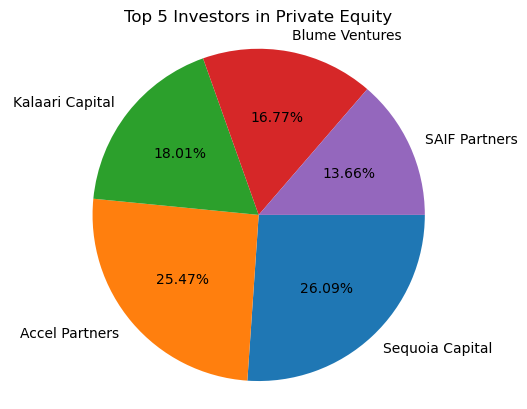

In [8]:
df = pd.read_csv(path)
df
# clean -> InvestorsName, InvestorsName, IndustryVertical
df.InvestorsName.fillna('', inplace = True)
df = df[df.InvestorsName != '']

df.StartupName.fillna('', inplace = True)
df = df[df.StartupName != '']
# InvestmentType
df.InvestmentType.fillna('', inplace = True)
df = df[df.InvestmentType != '']

tup = ('Undisclosed Investors', 'Undisclosed investors', 'undisclosed investors', 'Undisclosed Investor', 'Undisclosed',
'Undisclosed investor' ,'Undisclosed HNIs' ,'undisclosed investor', "High Networth Individuals (undisclosed)", 'undisclosed private investors',
'Undisclosed US Based Investors', "Other undisclosed investors", '3 undisclosed investors')

## clean this as well 

for i in tup :
    df = df[df.InvestorsName != i]

valid_df = df.copy()

## approach is to create invstor name dictionary with company names where its certain type of startups
## to add that particular startup we need to make a dictionary of startup and types

## must correct spelling first of types

company_types = []

for types in valid_df.InvestmentType :
    types = types.lower().replace(' ', '')
    if types == 'privateequity' :
        company_types.append('Private Equity')
    elif types == "seedfunding" :
        company_types.append("Seed Funding")
    elif types == "debtfunding" :
        company_types.append("Debt Funding")
    elif types == "crowdfunding" :
        company_types.append("Crowd Funding")
    else :
        pass
## add this new column
valid_df['valid_types'] = company_types

## drop prev column
valid_df.drop('InvestmentType', axis = 1, inplace = True)

## spelling mistakes for startup names

valid_df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
valid_df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
valid_df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
valid_df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)

valid_df['StartupName'].replace('Olacabs','Ola',inplace = True)
valid_df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
valid_df['StartupName'].replace('Olacabs','Ola',inplace = True)

valid_df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)

valid_df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

## create dictionary with these 2 columns : startup name VS types

startup_VS_types = {}

startup_names = list(valid_df.StartupName)
startup_types = list(valid_df.valid_types)

for i in range(len(startup_names)) :
    startup_VS_types[startup_names[i]] = startup_types[i]

## for adding compamies to investors names creating dictionary

investors_VS_companies = {}

## each investor can be multiple and separtated by ',', '&'

investors = list(valid_df.InvestorsName)
companies = list(valid_df.StartupName)

for i in range(len(investors)) :
    names = investors[i]
    names_list = names.split(',')
    for name in names_list :
        name = name.strip()
        final_names_list = name.split('&')
        for final_names in final_names_list :
            final_names = final_names.strip()
            valid_company = companies[i]
            company_type = startup_VS_types[companies[i]]
            if company_type == "Private Equity" :
                key = investors_VS_companies.get(final_names)
                if not key :
                    val = set()
                    val.add(valid_company)
                    investors_VS_companies[final_names] = val
                else :
                    investors_VS_companies[final_names].add(valid_company)

## change values to len of values
for key in investors_VS_companies :
    investors_VS_companies[key] = len(investors_VS_companies[key])

## sort it 
sorted_dict = {}
sorted_values = sorted(investors_VS_companies.values(), reverse = True)

for i in sorted_values:
    for k in investors_VS_companies.keys():
        if investors_VS_companies[k] == i:
            sorted_dict[k] = investors_VS_companies[k]
sorted_dict

## remove others, '', Others

del sorted_dict['Others']
del sorted_dict['others']
del sorted_dict['']

## take top 5

names = list(sorted_dict.keys())[0 : 5]
types = list(sorted_dict.values())[0 : 5]

## plotting graph

plt.pie(types, labels = names, counterclock = False, autopct = '%0.2f%%')
plt.title('Top 5 Investors in Private Equity')
plt.axis('equal')

## output

for i in range(len(names)) :
    print(names[i], types[i])
plt.show()

## SUBMITTED BY - PRATEEK SARNA